In [1]:
!pip install pygimli tetgen



# Field data inversion ("Koenigsee")

This minimalistic example shows how to use the Refraction Manager to invert
a field data set. Here, we consider the Koenigsee data set, which represents
classical refraction seismics data set with slightly heterogeneous overburden
and some high-velocity bedrock. The data file can be found in the [pyGIMLi
example data repository](https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt).


In [2]:
# We import pyGIMLi and the traveltime module.

import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.physics.traveltime as tt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The helper function `pg.getExampleData` downloads the data set to a temporary
location and loads it. Printing the data reveals that there are 714 data
points using 63 sensors (shots and geophones) with the data columns s (shot),
g (geophone), and t (traveltime). By default, there is also a validity flag.



In [3]:
data = pg.getExampleData("traveltime/koenigsee.sgt", verbose=True)
print(data)

INFO:pyGIMLi:Looking for traveltime/koenigsee.sgt in gimli-org/example-data/
29/10/25 - 07:56:52 - pyGIMLi - INFO - Looking for traveltime/koenigsee.sgt in gimli-org/example-data/
INFO:pyGIMLi:Getting: /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt from https://raw.githubusercontent.com//gimli-org/example-data//master/traveltime/koenigsee.sgt
29/10/25 - 07:56:52 - pyGIMLi - INFO - Getting: /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt from https://raw.githubusercontent.com//gimli-org/example-data//master/traveltime/koenigsee.sgt


   0%|          |0/9844 [00:00 < ?]

INFO:pyGIMLi:Reading /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt (<function load at 0x7aa48d85b880>)
29/10/25 - 07:56:52 - pyGIMLi - INFO - Reading /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt (<function load at 0x7aa48d85b880>)


md5: 641890bb17cb2bdf052cbc348669dfd0
Data: Sensors: 63 data: 714, nonzero entries: ['g', 's', 't', 'valid']


Let's have a look at the data in the form of traveltime curves.



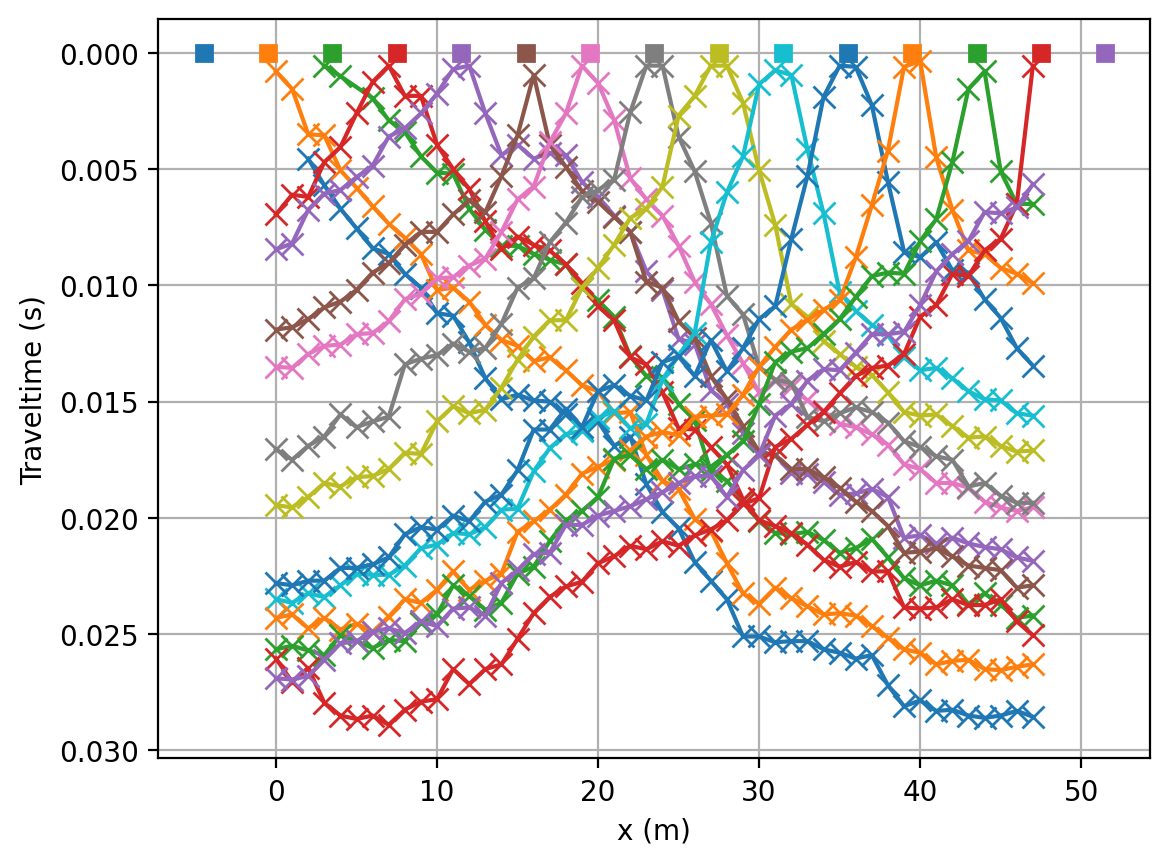

In [5]:
fig, ax = plt.subplots()
lines = tt.drawFirstPicks(ax, data)

We initialize the refraction manager.



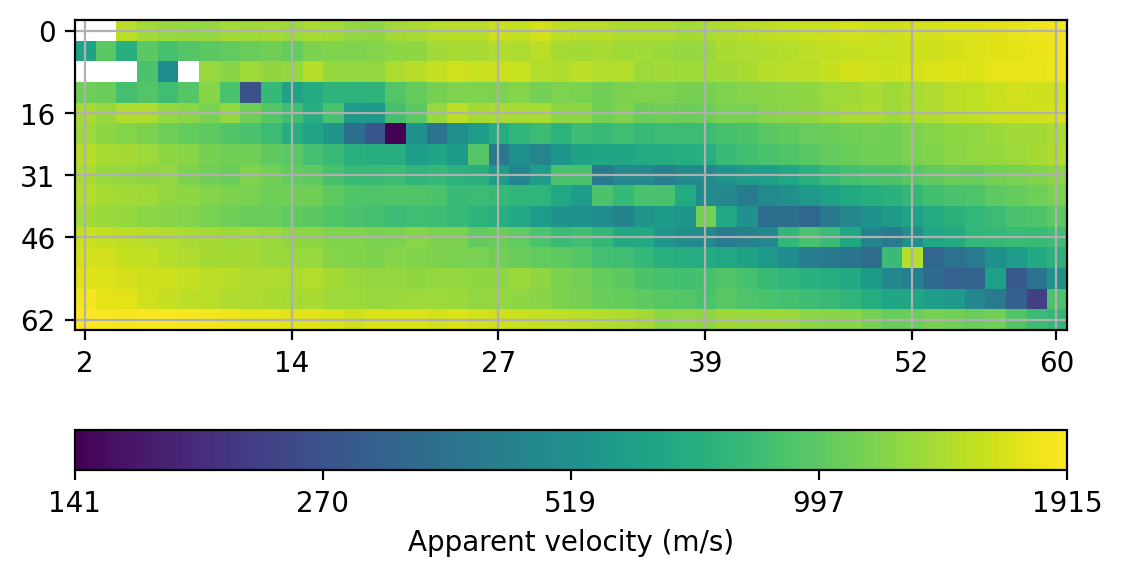

In [6]:
mgr = tt.TravelTimeManager(data)

# Alternatively, one can plot a matrix plot of apparent velocities which is the
# more general function also making sense for crosshole data.

ax, cbar = mgr.showData()

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [7]:
mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=5000, verbose=1)

INFO:pyGIMLi:Found 1 regions.
29/10/25 - 07:57:19 - pyGIMLi - INFO - Found 1 regions.
INFO:pyGIMLi:Found 1 regions.
29/10/25 - 07:57:19 - pyGIMLi - INFO - Found 1 regions.
ERROR:pyGIMLi:<class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
29/10/25 - 07:57:19 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
INFO:pyGIMLi:Creating forward mesh from region infos.
29/10/25 - 07:57:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (secnodes: 3) to solve forward task.
29/10/25 - 07:57:19 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
INFO:pyGIMLi:Create gradient starting model. 500: 5000
29/10/25 - 07:57:19 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
INFO:pyGIMLi:C

fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7aa47fb99260>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 3.5e-04/0.03
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  156.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   12.31 (dPhi = 91.50%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.91 (dPhi = 27.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.71 (dPhi = 24.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.10 (dPhi = 8.65%) lam: 20.0
------------------

1090 [905.8543643939366,...,2650.6913731728523]

Look at the fit between measured (crosses) and modelled (lines) traveltimes.



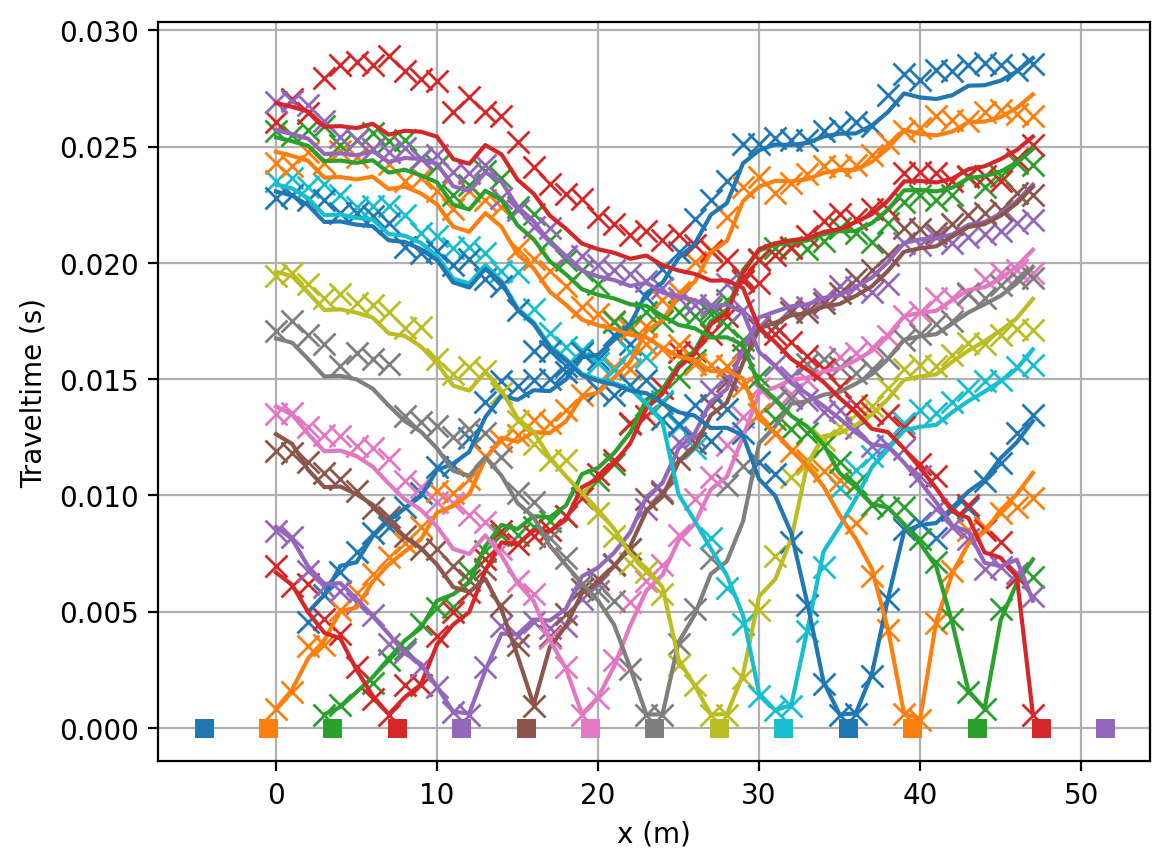

In [8]:
mgr.showFit(firstPicks=True)

You can plot only the model and customize with a bunch of keywords



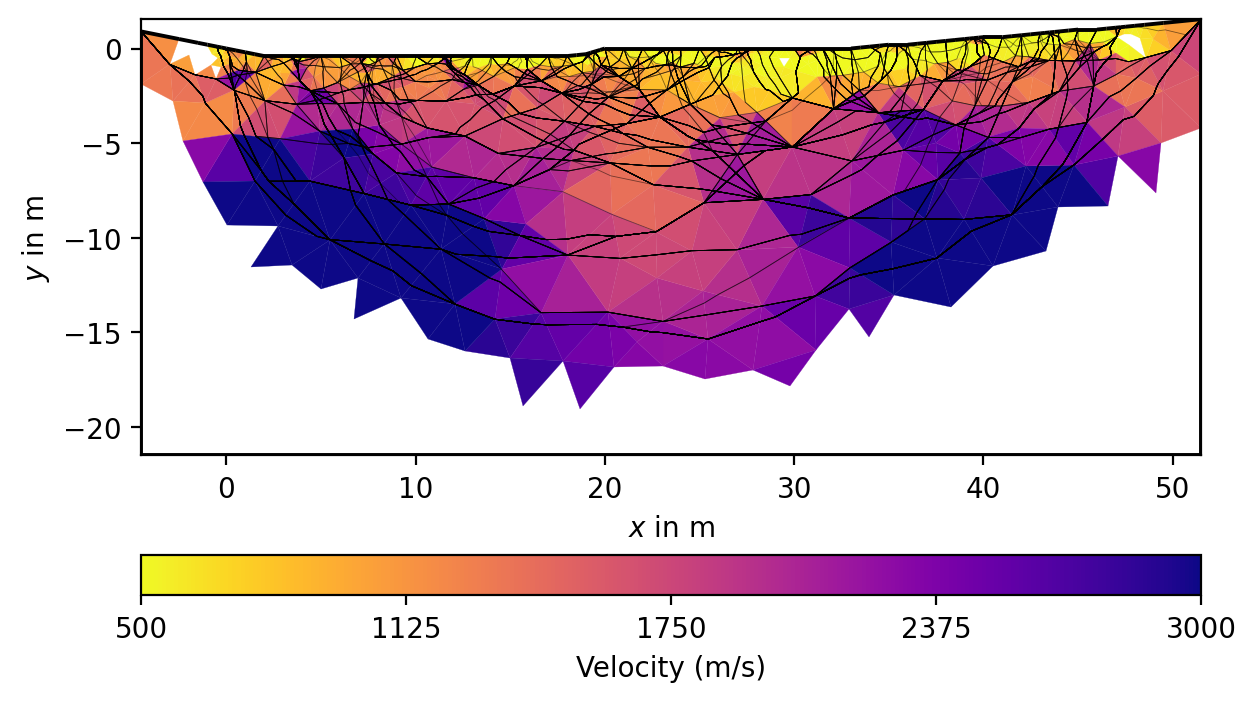

In [9]:
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage())
rays = mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)

# mgr.coverage() yields the ray coverage in m and standardizedCoverage as 0/1

In [10]:
mgr.coverage()

/usr/local/lib/python3.12/dist-packages/pygimli/frameworks/methodManager.py:907: RuntimeWarning: divide by zero encountered in log10
  return np.log10(covTrans[:nCells] / self.fop.paraDomain.cellSizes())


array([6.51143904, 6.92739081,       -inf, ...,       -inf,       -inf,
             -inf], shape=(1090,))

You can play around with the gradient starting model (`vTop` and `vBottom`
arguments) and the regularization strength `lam` and customize the mesh.

